# How does tweet count impact the BTC price?

### Abstract: According to some data investigations, if number of tweets increase by 1% Bitcoin’s volume increases the next day by 2.5% in 2017, 0.64% in 2018 and 0.72% in 2019. We will investigate is this relationship powerful as old hyped days and we will use sentiment analysis to how does Twitter impact BTC price. We will try price prediction according to tweets data.

#### Oğuzhan Çetinkaya - 21946003 
#### Meryem Ülkü Kara - 21727355


## Table of Content

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## Problem <a class="anchor" id="problem"></a>

Bitcoin prices are unpredictable and market movements can be manipulative. Bitcoin is not backed by a central bank or supported by a government. Therefore the monetary policy tools, inflation rates, and economic growth measurements that typically influence the value of a currency do not apply to Bitcoin. So the following factors influence its price:

- Supply and demand
- Production cost while the mining process
- Number of competing cryptocurrencies
- Cryptocurrency exchanges
- Regulations governing its sale and use
- Social media (What we are looking for)

We will investigate the social media side effects on Bitcoin price. Prices can manipulate by influencers or famous people with social media platforms power. How much power these tweets have on Bitcoin price and we will check correlation between tweet sentiment and BTC price by using two different sentiment analysis. Sentiment Analysis is a process of analyzing data and classifying it based on the need of our research. That will help us decipher emotions of general public and gather information regarding the context.

In [1]:
import pandas as pd
import numpy as np
import tweepy as tw
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import datetime
import re
import numpy as np
from tqdm import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler

## Data Understanding<a class="anchor" id="data_understanding"></a>

We need to get tweets about btc. There were techniques for get data from API secondly but it only allows get 10000 data with big file size so we choose tweepy.Client.get_recent_tweets_count() function for getting data from API which is appropriate to our data requirements.

Unfortunately Twitter allows us only one week data. We need to get Academic Research Authorization for more data but undergraduate student can't get this authorization. (tweepy.Client.get_all_tweets_count function for more big data but it requires Academic Research API Key)

We get bearer token for Twitter API from developer.twitter.com for getting hourly tweet counts. We have got hourly 7 days data 2131001 tweet in total.  

### Creating Twitter Dataset

In [ ]:
client = tw.Client(bearer_token="AAAAAAAAAAAAAAAAAAAAAOdskQEAAAAATaAxQ5JPqhwdsfhMvBaG7KPtDig%3Dz1w1muBSrgsvFaSvPOZezYrK5ogODQhYoojFSAvMfnvz5fzEcG")

query = 'btc'

counts = client.get_recent_tweets_count(query=query, granularity='hour')
df = pd.DataFrame()
for count in counts.data:
    count['end'] = count['end'].replace('T', ' ')
    count['end'] = count['end'].replace(":00.000Z", '')
    df_dictionary = pd.DataFrame([count])
    df = pd.concat([df, df_dictionary], ignore_index=True)
df.to_csv('test_btc_tweet_count.csv')

Raw scaled tweet count data and scaled BTC price data graph without sentiment analysis.

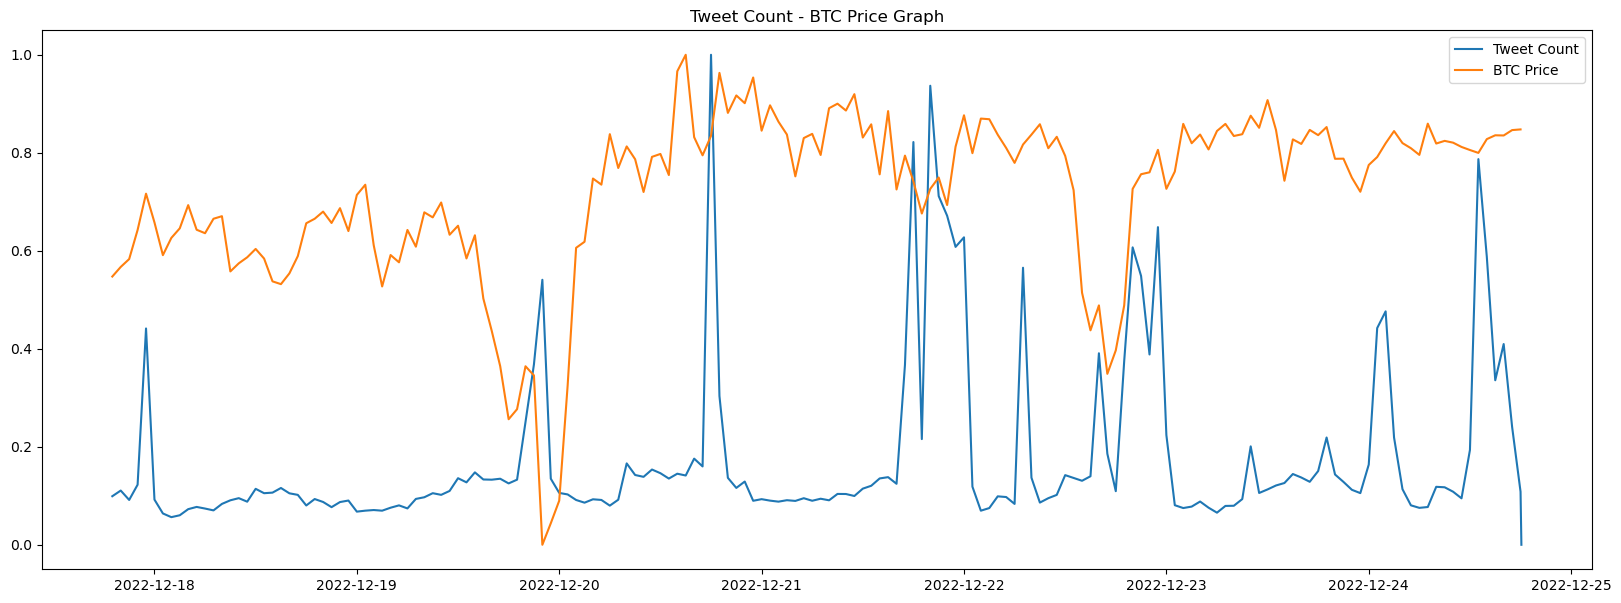

In [38]:
min_max_scaler = MinMaxScaler()
test_tweet_df = pd.read_csv("test_btc_tweet_count.csv")
test_btc_df = pd.read_csv("test_Binance_BTCUSDT_1h.csv")

test_tweet_df['end'] = test_tweet_df['end'].apply(lambda x: pd.to_datetime(x))
test_btc_df['Date'] = test_btc_df['Date'].apply(lambda x: pd.to_datetime(x))

plt.figure(figsize=(20,7))
plt.plot(test_tweet_df["end"],min_max_scaler.fit_transform(test_tweet_df["tweet_count"].values.reshape(-1,1)), label="Tweet Count")
plt.plot(test_btc_df["Date"],min_max_scaler.fit_transform(test_btc_df["Close"].values.reshape(-1,1)), label="BTC Price")
plt.title("Tweet Count - BTC Price Graph")
plt.legend()
plt.show()

It is not enough data for sentiment analysis so we found data from Kaggle. https://www.kaggle.com/datasets/kaushiksuresh147/bitcoin-tweets

In [2]:
import pandas as pd
df = pd.read_csv("Bitcoin_tweets.csv",low_memory=False,lineterminator='\n')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


### Creating BTC Price Dataset

We get hourly btc price data from https://www.cryptodatadownload.com/data/binance/

In [3]:
btc_df = pd.read_csv("Binance_BTCUSDT_1h.csv")
btc_df.tail()

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
46265,1.670000e+12,12/28/2022 19:00,BTCUSDT,16633.18,16647.10,16591.38,16595.92,6112.85910,1.015728e+08,195362
46266,1.670000e+12,12/28/2022 20:00,BTCUSDT,16595.43,16615.67,16578.57,16596.00,5608.78253,9.310542e+07,179174
46267,1.670000e+12,12/28/2022 21:00,BTCUSDT,16596.90,16598.42,16465.33,16527.88,14863.50775,2.456000e+08,295547
46268,1.670000e+12,12/28/2022 22:00,BTCUSDT,16527.88,16542.41,16475.98,16518.03,7262.60362,1.198775e+08,172594
46269,1.670000e+12,12/28/2022 23:00,BTCUSDT,16518.03,16560.64,16511.16,16547.31,7050.19350,1.166135e+08,164639


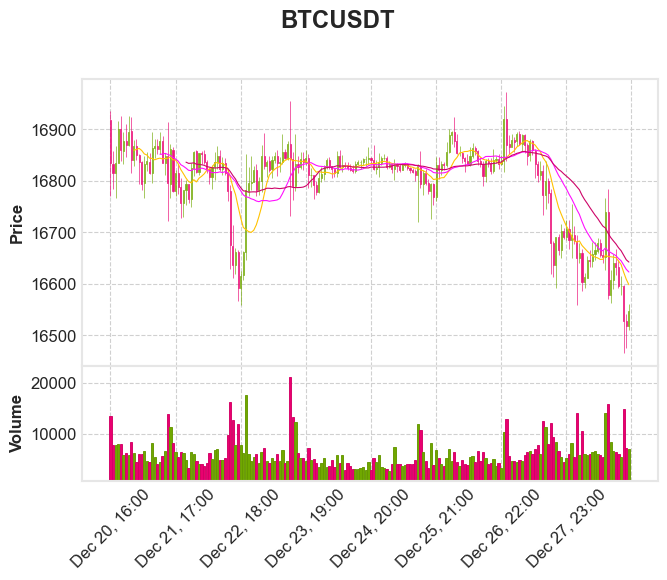

In [33]:
import mplfinance as mpf

btc_df.rename(columns={'Volume BTC': 'Volume'}, inplace=True)
btc_df['Date'] = btc_df['Date'].apply(lambda x: pd.to_datetime(x))
mpf.plot(btc_df.set_index('Date').tail(200), type='candle', style='binance', volume=True, title='BTCUSDT', mav=(10, 20, 30))

## Data Preparation<a class="anchor" id="data_preparation"></a>

In [6]:
df_raw = pd.read_csv("Bitcoin_tweets.csv",low_memory=False,lineterminator='\n')
print(df_raw.shape)
df_raw.head()

(4585553, 13)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


Dropping unnecessary columns and cleaning text for processes.

tqdm is a library in Python which is used for creating Progress Meters or Progress Bars.

In [7]:
df_raw = df_raw.sort_values(by = 'date')
dd = df_raw.sample(frac=0.01, replace=False, random_state=1)
dd.reset_index(inplace=True)
for i,s in enumerate(tqdm(dd['text'],position=0, leave=True)):
    text = str(dd.loc[i, 'text'])
    text = text.replace("#", "")
    text = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', text, flags=re.MULTILINE)
    text = re.sub('@\\w+ *', '', text, flags=re.MULTILINE)
    dd.loc[i, 'text'] = text
dd.to_csv("Bitcoin_tweets_clean.csv", header=True, encoding='utf-8',index=False)

100%|██████████████████████████████████████████████████████████████████████████| 45856/45856 [00:39<00:00, 1158.81it/s]


Some datas slide so we dropping that nan rows.

In [4]:
tweet_df = pd.read_csv("Bitcoin_tweets_clean.csv")
tweet_df.drop(columns=tweet_df.columns[0], axis=1, inplace=True)
tweet_df = tweet_df[tweet_df['is_retweet'].notna()]
tweet_df['date'] = tweet_df['date'].apply(lambda x: pd.to_datetime(x))
tweet_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Geordie_Crypto_Potato,NaN,Amateur crypto enthusiast,2022-05-04 18:04:08,27.0,127.0,211.0,False,2022-07-17 21:42:49,Easy! Easy! Easy!\n\nOnly a few projects out t...,"['DeFi', 'BNB', 'BNBChain', 'BSC', 'ELITEARMY'...",Twitter for Android,False
1,lastcoinstanding,NaN,#Bitcoin Rationalist and pleb. Amateur educato...,2017-09-24 18:51:25,3691.0,2237.0,256981.0,False,2022-05-01 14:05:12,"bitcoin, because it's addressing a TAM of ~300...",['bitcoin'],Twitter Web App,False
2,everything is temporary,Inyourmind,Including your blue check mark,2021-05-26 16:08:13,627.0,354.0,58128.0,False,2022-11-09 20:45:39,12k let's goooo Bitcoin,['Bitcoin'],Twitter for Android,False
3,Live Price Crypto,NaN,I Tweet the latest #Bitcoin & #Ethereum price ...,2022-03-10 14:06:46,3435.0,4.0,20.0,False,2022-09-02 04:49:13,Bitcoin Last Price $20182 BTC 🚀\nDaily Indicat...,"['Bitcoin', 'BTC', 'Ethereum', 'ETH', 'Crypto'...",vaiotapi,False
4,Sling Slang Slung,NaN,pronouns: she/him,2022-05-29 21:06:58,15.0,40.0,48.0,False,2022-06-26 14:15:08,Raise your hand if you actually think btc has ...,['btc'],Twitter for iPhone,False


In [5]:
tweet_df.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
45851,ANOTI🦅,NaN,Whale Watcher | Testing in Prod,2022-07-13 22:40:43,19.0,137.0,2.0,False,2022-11-08 16:29:03,🔼⏰ $CELR Is Warming Up From 0.0154 ...,['btc'],Twitter Web App,False
45852,Live Price Crypto,NaN,I Tweet the latest #Bitcoin & #Ethereum price ...,2022-03-10 14:06:46,3436.0,4.0,20.0,False,2022-09-01 03:05:57,Bitcoin Last Price $20110 BTC 🚀\nDaily Indicat...,"['Bitcoin', 'BTC', 'Ethereum', 'ETH', 'Blockch...",vaiotapi,False
45853,Cam Crypto,NaN,Dirtbikes & Crypto #NFT #Bitcoin #BNB $Wanderl...,2016-02-02 22:30:51,1497.0,133.0,520.0,False,2022-03-09 19:45:52,CHECK OUT $XRISE IT IS ON FIRE! CG AND CMC SOO...,"['EnterShillGang', 'EnterArmy', 'EnterNFT', 'n...",Twitter Web App,False
45854,Whales Radar,İstanbul,https://t.co/oZVtGZzi5n\n\nCrypto Whale Radar ...,2010-01-03 15:43:57,619.0,1.0,2.0,False,2022-05-31 10:15:02,RIFUSDT RIF \nSignal 1 \n\nLast Signal: N/A \...,"['RIFUSDT', 'RIF', 'Crypto', 'Bitcoin', 'BTC',...",MT4 to Twitter,False
45855,NorbiCrypto FBM #132 🐻 Dronie #8289 ⚛️ $XPR,Ireland,#Crypto and #NFT enthusiast.\nBitcoin still ru...,2018-02-01 22:15:41,723.0,1002.0,3881.0,False,2022-04-22 14:42:01,Bitcoin for $20k? I'm ready. btc cryptocurrency,"['btc', 'cryptocurrency']",Twitter for Android,False


Droping unnecessary columns.

In [6]:
btc_df = pd.read_csv("Binance_BTCUSDT_1h.csv")
btc_df.drop(columns=btc_df.columns[0], axis=1, inplace=True)
btc_df.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
0,8/17/2017 4:00,BTCUSDT,4261.48,4313.62,4261.32,4308.83,47.181009,202366.138400,171
1,8/17/2017 5:00,BTCUSDT,4308.83,4328.69,4291.37,4315.32,23.234916,100304.823600,102
2,8/17/2017 6:00,BTCUSDT,4330.29,4345.45,4309.37,4324.35,7.229691,31282.312670,36
3,8/17/2017 7:00,BTCUSDT,4316.62,4349.99,4287.41,4349.99,4.443249,19241.058300,25
4,8/17/2017 8:00,BTCUSDT,4333.32,4377.85,4333.32,4360.69,0.972807,4239.503586,28


Taking BTC price data from 2021-02-05 to 2022-11-21 because we have tweet data between these dates.

In [7]:
btc_df['Date'] = btc_df['Date'].apply(lambda x: pd.to_datetime(x))
btc_df = btc_df.loc[(btc_df['Date'] >= '2021-02-05 10:00:00') & (btc_df['Date'] <= '2022-11-21 23:00:00')]
btc_df = btc_df.reset_index(drop=True)
btc_df.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
0,2021-02-05 10:00:00,BTCUSDT,37251.07,37655.44,37200.00,37395.91,2315.261816,8.673690e+07,70360
1,2021-02-05 11:00:00,BTCUSDT,37395.92,37733.75,37395.78,37691.32,2165.149463,8.140203e+07,63507
2,2021-02-05 12:00:00,BTCUSDT,37691.32,38151.69,37527.14,37850.36,4197.957336,1.591558e+08,104275
3,2021-02-05 13:00:00,BTCUSDT,37850.36,38298.00,37767.09,38272.32,3967.773058,1.508133e+08,127525
4,2021-02-05 14:00:00,BTCUSDT,38272.33,38310.12,37960.73,38095.02,4108.056943,1.567450e+08,99933


## Modeling<a class="anchor" id="modeling"></a>

### VADER Sentiment

VADER (Valence Aware Dictionary for sEntiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.

The Compound is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

positive sentiment : (compound >= 0.05)

neutral sentiment : (compound > -0.05) and (compound < 0.05) 

negative sentiment : (compound <= -0.05)

In [8]:
analyzer = SentimentIntensityAnalyzer()
compound = []
for i,s in enumerate(tqdm(tweet_df['text'],position=0, leave=True)):
    vs = analyzer.polarity_scores(str(s))
    compound.append(vs["compound"])
tweet_df["compound"] = compound
tweet_df.head()

100%|██████████████████████████████████████████████████████████████████████████| 45854/45854 [00:06<00:00, 6820.59it/s]


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,compound
0,Geordie_Crypto_Potato,NaN,Amateur crypto enthusiast,2022-05-04 18:04:08,27.0,127.0,211.0,False,2022-07-17 21:42:49,Easy! Easy! Easy!\n\nOnly a few projects out t...,"['DeFi', 'BNB', 'BNBChain', 'BSC', 'ELITEARMY'...",Twitter for Android,False,0.8617
1,lastcoinstanding,NaN,#Bitcoin Rationalist and pleb. Amateur educato...,2017-09-24 18:51:25,3691.0,2237.0,256981.0,False,2022-05-01 14:05:12,"bitcoin, because it's addressing a TAM of ~300...",['bitcoin'],Twitter Web App,False,0.3400
2,everything is temporary,Inyourmind,Including your blue check mark,2021-05-26 16:08:13,627.0,354.0,58128.0,False,2022-11-09 20:45:39,12k let's goooo Bitcoin,['Bitcoin'],Twitter for Android,False,0.0000
3,Live Price Crypto,NaN,I Tweet the latest #Bitcoin & #Ethereum price ...,2022-03-10 14:06:46,3435.0,4.0,20.0,False,2022-09-02 04:49:13,Bitcoin Last Price $20182 BTC 🚀\nDaily Indicat...,"['Bitcoin', 'BTC', 'Ethereum', 'ETH', 'Crypto'...",vaiotapi,False,0.4019
4,Sling Slang Slung,NaN,pronouns: she/him,2022-05-29 21:06:58,15.0,40.0,48.0,False,2022-06-26 14:15:08,Raise your hand if you actually think btc has ...,['btc'],Twitter for iPhone,False,0.9118


Calculating score by taking into consideration features of account who tweets about BTC.

In [9]:
scores = []
for i, s in tqdm(tweet_df.iterrows(), total=tweet_df.shape[0], position=0, leave=True):
    try:
        scores.append(s["compound"] * ((int(s["user_followers"]))) * ((int(s["user_favourites"])+1)/int(s['user_followers']+1)) *((int(s["is_retweet"])+1)))
    except:
        scores.append(np.nan)
tweet_df["score"] = scores
tweet_df.head()

100%|█████████████████████████████████████████████████████████████████████████| 45854/45854 [00:02<00:00, 15793.20it/s]


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,compound,score
0,Geordie_Crypto_Potato,NaN,Amateur crypto enthusiast,2022-05-04 18:04:08,27.0,127.0,211.0,False,2022-07-17 21:42:49,Easy! Easy! Easy!\n\nOnly a few projects out t...,"['DeFi', 'BNB', 'BNBChain', 'BSC', 'ELITEARMY'...",Twitter for Android,False,0.8617,176.156100
1,lastcoinstanding,NaN,#Bitcoin Rationalist and pleb. Amateur educato...,2017-09-24 18:51:25,3691.0,2237.0,256981.0,False,2022-05-01 14:05:12,"bitcoin, because it's addressing a TAM of ~300...",['bitcoin'],Twitter Web App,False,0.3400,87350.214269
2,everything is temporary,Inyourmind,Including your blue check mark,2021-05-26 16:08:13,627.0,354.0,58128.0,False,2022-11-09 20:45:39,12k let's goooo Bitcoin,['Bitcoin'],Twitter for Android,False,0.0000,0.000000
3,Live Price Crypto,NaN,I Tweet the latest #Bitcoin & #Ethereum price ...,2022-03-10 14:06:46,3435.0,4.0,20.0,False,2022-09-02 04:49:13,Bitcoin Last Price $20182 BTC 🚀\nDaily Indicat...,"['Bitcoin', 'BTC', 'Ethereum', 'ETH', 'Crypto'...",vaiotapi,False,0.4019,8.437444
4,Sling Slang Slung,NaN,pronouns: she/him,2022-05-29 21:06:58,15.0,40.0,48.0,False,2022-06-26 14:15:08,Raise your hand if you actually think btc has ...,['btc'],Twitter for iPhone,False,0.9118,41.885813


## Evaluation<a class="anchor" id="evaluation"></a>

Grouping and preparation of dataset for Sentiment Analysis.

In [14]:
tweets = tweet_df.copy()
tweets.index = tweets['date']
tweets_grouped = tweets.resample('1h').sum(numeric_only=True)

crypto_usd = btc_df.copy()
crypto_usd.index = crypto_usd['Date']
crypto_usd_grouped = crypto_usd.resample('1h')['Close'].mean()

In [15]:
beggining = max(tweets_grouped.index.min().replace(), crypto_usd_grouped.index.min())
end = min(tweets_grouped.index.max().replace(), crypto_usd_grouped.index.max())
tweets_grouped = tweets_grouped[beggining:end]
crypto_usd_grouped = crypto_usd_grouped[beggining:end]

### Normalized Data VADER Sentiment Analysis

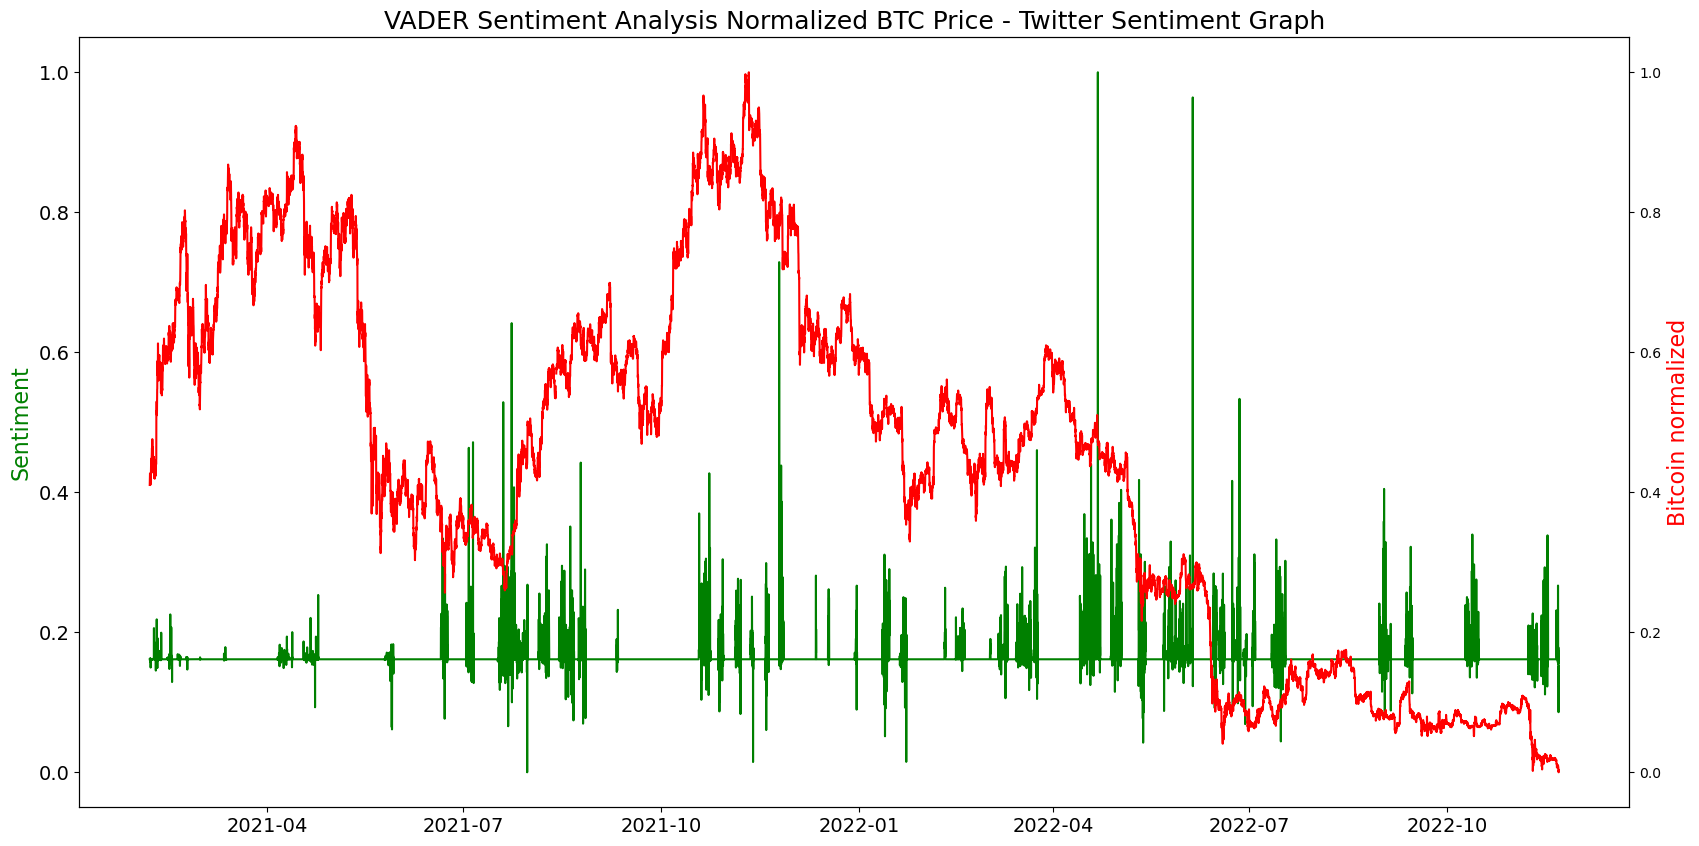

In [16]:
tweets_grouped_copy = tweets_grouped.copy()
tweets_grouped_score_scaled = min_max_scaler.fit_transform(tweets_grouped_copy['score'].values.reshape(-1,1))
tweets_grouped_copy['normalized_score'] = tweets_grouped_score_scaled

crypto_usd_grouped_copy = crypto_usd_grouped.copy()
crypto_used_grouped_scaled = min_max_scaler.fit_transform(crypto_usd_grouped_copy.values.reshape(-1,1))
crypto_usd_grouped_copy['normalized_price'] = crypto_used_grouped_scaled

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("VADER Sentiment Analysis Normalized BTC Price - Twitter Sentiment Graph", fontsize=18)
ax1.tick_params(labelsize=14)

ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped_copy.index, tweets_grouped_copy['normalized_score'], 'g-')
ax2.plot_date(tweets_grouped_copy.index, crypto_usd_grouped_copy['normalized_price'], 'r-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin normalized", color='r', fontsize=16)
plt.show()

### Correlation
Correlation is a parameter that describes the directional relationship between two variables, whether these two variables are related or not.

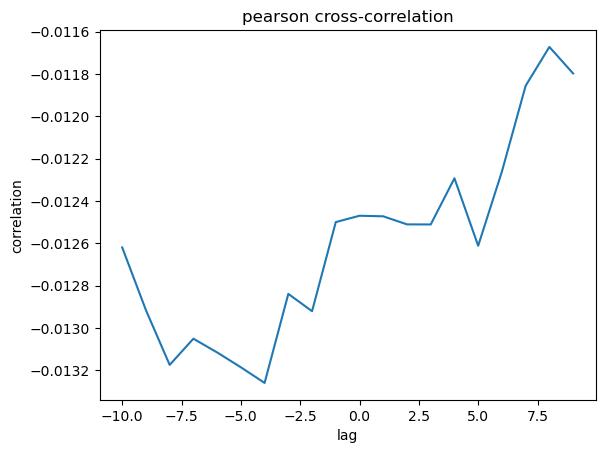

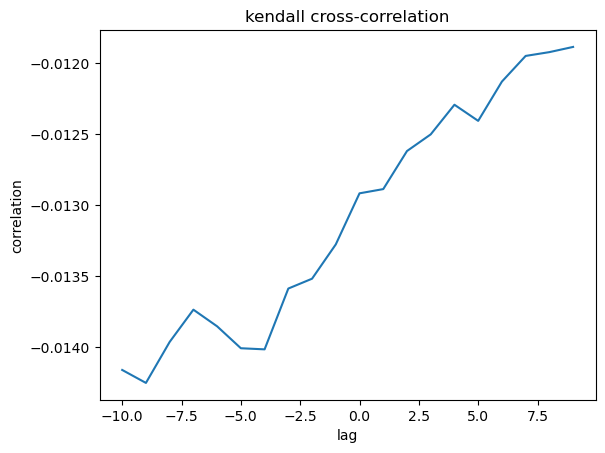

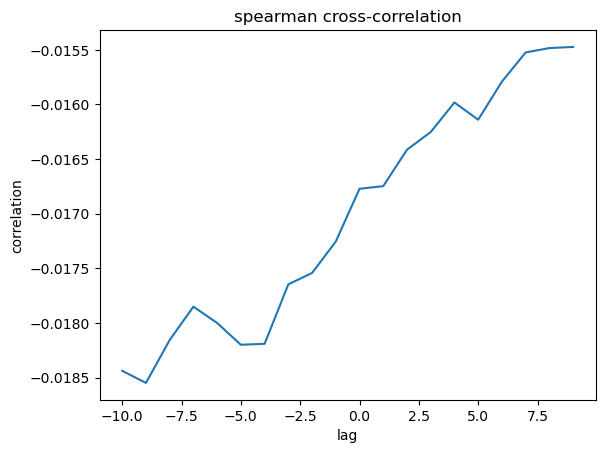

In [17]:
pearson_corr = [tweets_grouped.corrwith(crypto_usd_grouped.shift(i), method="pearson")['score'] for i in range(-10,10)]
plt.plot(range(-10,10), pearson_corr)
plt.title("pearson cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()
kendall_corr = [tweets_grouped.corrwith(crypto_usd_grouped.shift(i), method="kendall")['score'] for i in range(-10,10)]
plt.plot(range(-10,10), kendall_corr)
plt.title("kendall cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()
spearman_corr = [tweets_grouped.corrwith(crypto_usd_grouped.shift(i), method="spearman")['score'] for i in range(-10,10)]
plt.plot(range(-10,10), spearman_corr)
plt.title("spearman cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

In [18]:
tweet_df_clean = tweet_df.copy()
tweet_df_clean.dropna(subset=['hashtags'], inplace=True)
tweet_df_clean = tweet_df_clean[['text']] 
tweet_df_clean.columns = ['tweets']
tweet_df_clean['date'] = pd.to_datetime(tweet_df['date'])
tweet_df_clean.head()

,tweets,date
0,Easy! Easy! Easy!\n\nOnly a few projects out t...,2022-07-17 21:42:49
1,"bitcoin, because it's addressing a TAM of ~300...",2022-05-01 14:05:12
2,12k let's goooo Bitcoin,2022-11-09 20:45:39
3,Bitcoin Last Price $20182 BTC 🚀\nDaily Indicat...,2022-09-02 04:49:13
4,Raise your hand if you actually think btc has ...,2022-06-26 14:15:08


### TextBlob Sentiment

Textblob can be used for complex analysis and working with textual data. When a sentence is passed into Textblob it gives two outputs, which are polarity and subjectivity. Polarity is the output that lies between [-1,1], where -1 refers to negative sentiment and +1 refers to positive sentiment.

In [19]:
from textblob import TextBlob

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getSentiment(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

tweet_df_clean['polarity'] = tweet_df_clean['tweets'].apply(getPolarity)
tweet_df_clean['subjectivity'] = tweet_df_clean['tweets'].apply(getSubjectivity)
tweet_df_clean['sentiment'] = tweet_df_clean['polarity'].apply(getSentiment)
tweet_df_clean['score'] = tweet_df_clean['tweets'].apply(lambda x: (TextBlob(x).sentiment.polarity))
tweet_df_clean.head()

,tweets,date,polarity,subjectivity,sentiment,score
0,Easy! Easy! Easy!\n\nOnly a few projects out t...,2022-07-17 21:42:49,0.28500,0.720000,positive,0.28500
1,"bitcoin, because it's addressing a TAM of ~300...",2022-05-01 14:05:12,-0.10625,0.543750,negative,-0.10625
2,12k let's goooo Bitcoin,2022-11-09 20:45:39,0.00000,0.000000,neutral,0.00000
3,Bitcoin Last Price $20182 BTC 🚀\nDaily Indicat...,2022-09-02 04:49:13,0.00000,0.033333,neutral,0.00000
4,Raise your hand if you actually think btc has ...,2022-06-26 14:15:08,0.00000,0.112500,neutral,0.00000


Grouping and preparation of dataset for Sentiment Analysis.

In [20]:
tweets = tweet_df_clean.copy()
tweets.index = tweets['date']
tweets_grouped = tweets.resample('1h').sum(numeric_only=True)

crypto_usd = btc_df.copy()
crypto_usd.index = crypto_usd['Date']
crypto_usd_grouped = crypto_usd.resample('1h')['Close'].mean()

In [21]:
beggining = max(tweets_grouped.index.min().replace(), crypto_usd_grouped.index.min())
end = min(tweets_grouped.index.max().replace(), crypto_usd_grouped.index.max())
tweets_grouped = tweets_grouped[beggining:end]
crypto_usd_grouped = crypto_usd_grouped[beggining:end]

### Normalized Data TextBlob Sentiment Analysis

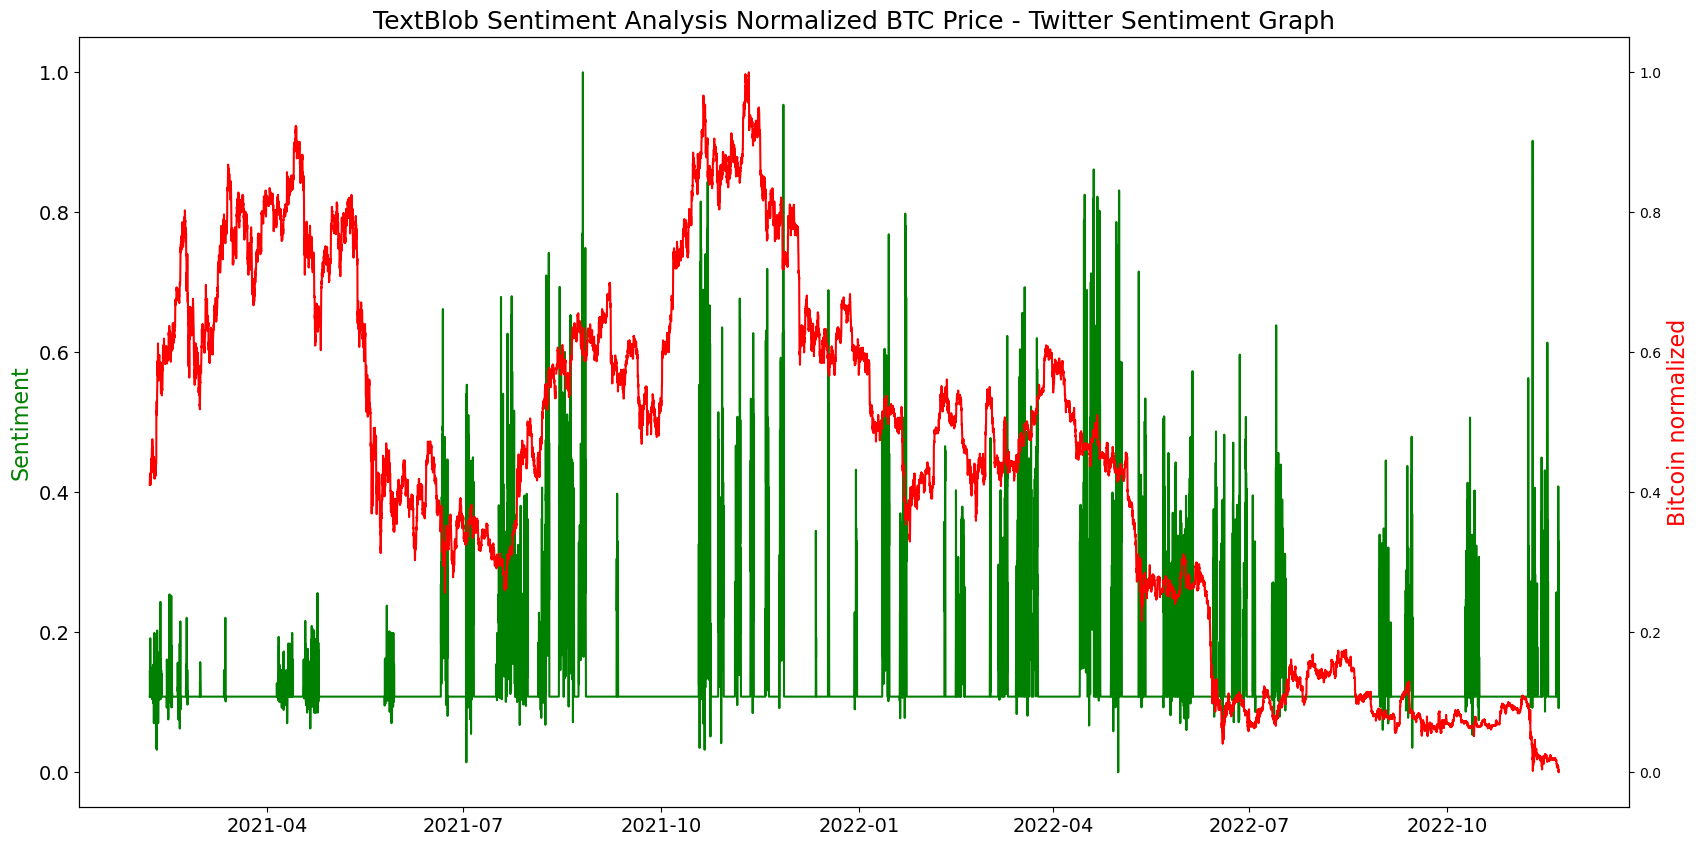

In [22]:
tweets_grouped_copy = tweets_grouped.copy()
tweets_grouped_score_scaled = min_max_scaler.fit_transform(tweets_grouped_copy['score'].values.reshape(-1,1))
tweets_grouped_copy['normalized_score'] = tweets_grouped_score_scaled

crypto_usd_grouped_copy = crypto_usd_grouped.copy()
crypto_used_grouped_scaled = min_max_scaler.fit_transform(crypto_usd_grouped_copy.values.reshape(-1,1))
crypto_usd_grouped_copy['normalized_price'] = crypto_used_grouped_scaled

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("TextBlob Sentiment Analysis Normalized BTC Price - Twitter Sentiment Graph", fontsize=18)
ax1.tick_params(labelsize=14)

ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped_copy.index, tweets_grouped_copy['normalized_score'], 'g-')
ax2.plot_date(tweets_grouped_copy.index, crypto_usd_grouped_copy['normalized_price'], 'r-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin normalized", color='r', fontsize=16)
plt.show()

### Correlation
Correlation is a parameter that describes the directional relationship between two variables, whether these two variables are related or not.

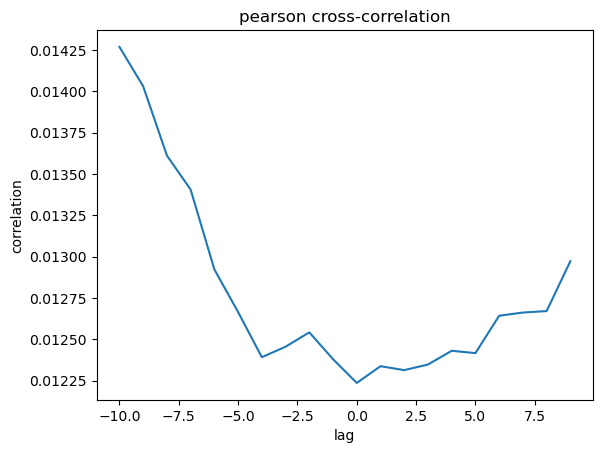

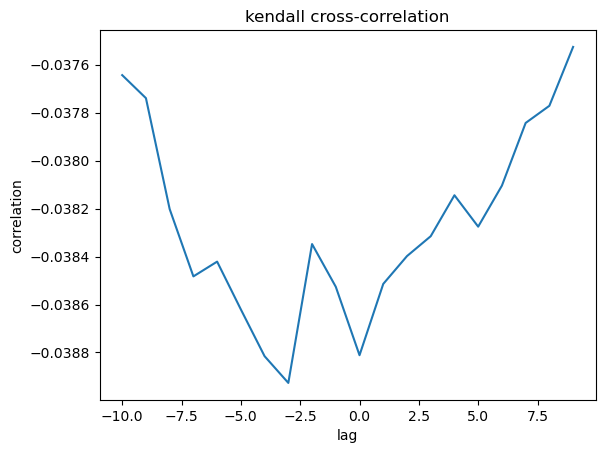

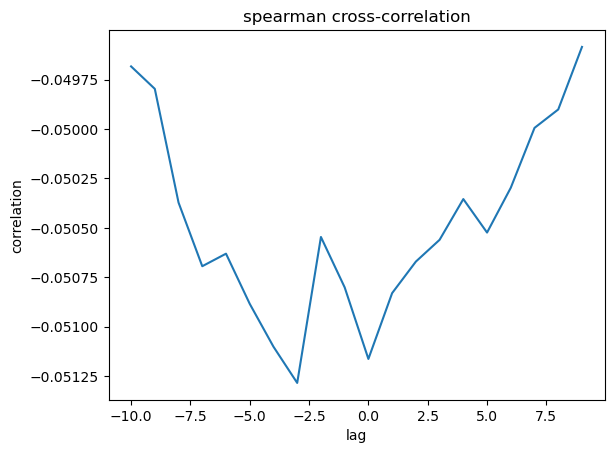

In [23]:
pearson_corr = [tweets_grouped.corrwith(crypto_usd_grouped.shift(i), method="pearson")['score'] for i in range(-10,10)]
plt.plot(range(-10,10), pearson_corr)
plt.title("pearson cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()
kendall_corr = [tweets_grouped.corrwith(crypto_usd_grouped.shift(i), method="kendall")['score'] for i in range(-10,10)]
plt.plot(range(-10,10), kendall_corr)
plt.title("kendall cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()
spearman_corr = [tweets_grouped.corrwith(crypto_usd_grouped.shift(i), method="spearman")['score'] for i in range(-10,10)]
plt.plot(range(-10,10), spearman_corr)
plt.title("spearman cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

### Price Prediction

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import train_test_split

Applying tokenization is the first step in converting our words into numerical values that can be processed by a machine learning model. That sentences of different lengths will be problematic for our model. This is where padding comes into play.

In [25]:
tokenizer = Tokenizer(num_words=5000, lower=True, split=' ')
tokenizer.fit_on_texts(tweet_df_clean['tweets'])
X = pad_sequences(tokenizer.texts_to_sequences(tweet_df_clean['tweets']), padding='post', maxlen=50)

In [26]:
y = pd.get_dummies(tweet_df_clean['sentiment']).values

The train_test_split() method is used to split our data into train and test sets for prediction.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(36552, 50) (9139, 50) (36552, 3) (9139, 3)


The Sequential model API is a way of creating deep learning models where an instance of the Sequential class is created and model layers are created and added to it.

LSTM stands for Long Short-Term Memory. LSTM cells are used in RNN(Recurrent Neural Networks) that learn to predict the future from sequences of variable lengths.

In [28]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, dropout=0.2, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True, dropout=0.2))
model.add(LSTM(units=50, dropout=0.2))
model.add(Dense(units = 1))
model.compile(loss='mean_squared_error', optimizer='adam')

Fitting model with data.

In [34]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
286/286 [==============================] - 35s 122ms/step - loss: 0.2222 - val_loss: 0.2222
Epoch 2/10
286/286 [==============================] - 36s 124ms/step - loss: 0.2222 - val_loss: 0.2222
Epoch 3/10
286/286 [==============================] - 36s 126ms/step - loss: 0.2222 - val_loss: 0.2222
Epoch 4/10
286/286 [==============================] - 37s 130ms/step - loss: 0.2222 - val_loss: 0.2222
Epoch 5/10
286/286 [==============================] - 36s 128ms/step - loss: 0.2222 - val_loss: 0.2222
Epoch 6/10
286/286 [==============================] - 37s 129ms/step - loss: 0.2222 - val_loss: 0.2222
Epoch 7/10
286/286 [==============================] - 37s 128ms/step - loss: 0.2222 - val_loss: 0.2222
Epoch 8/10
286/286 [==============================] - 37s 131ms/step - loss: 0.2222 - val_loss: 0.2222
Epoch 9/10
286/286 [==============================] - 38s 133ms/step - loss: 0.2222 - val_loss: 0.2222
Epoch 10/10
286/286 [==============================] - 37s 130ms/step - l

We created a model and fitted with trained data, and we will use it to make a prediction.

In [35]:
prediction = model.predict(X_test)
prediction

286/286 [==============================] - 8s 27ms/step


array([[0.33536068],
       [0.33407184],
       [0.33413765],
       ...,
       [0.3340003 ],
       [0.3341527 ],
       [0.33471242]], dtype=float32)

In [36]:
prediction = min_max_scaler.inverse_transform(prediction)
prediction

array([[33418.33 ],
       [33350.04 ],
       [33353.527],
       ...,
       [33346.246],
       [33354.324],
       [33383.98 ]], dtype=float32)

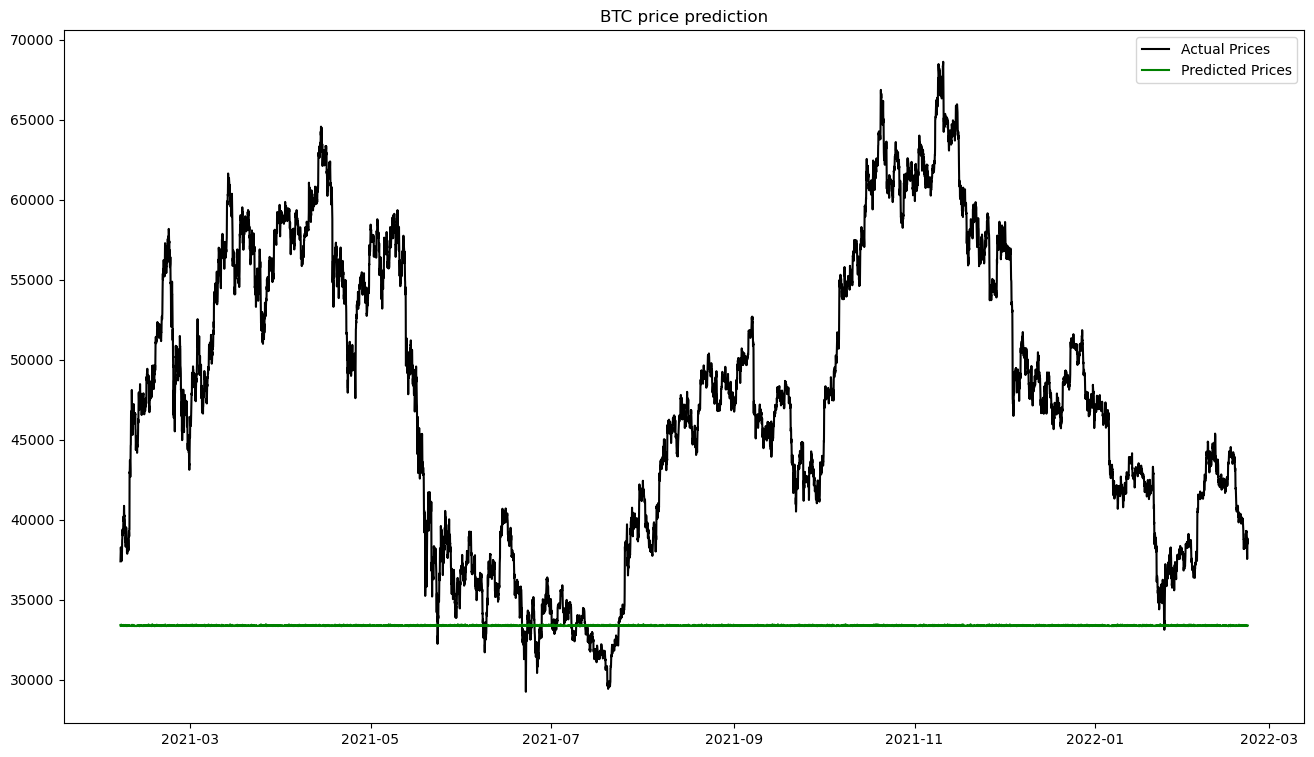

In [37]:
plt.figure(figsize=(16,9))
plt.plot(btc_df['Date'][:9139], btc_df['Close'][:9139], color='black', label='Actual Prices')
plt.plot(btc_df['Date'][:9139], prediction, color='green', label='Predicted Prices')
plt.title('BTC price prediction')
plt.legend()
plt.show()

##### In today's world, relationship between tweets and BTC Price not powerful as old days.

## References<a class="anchor" id="references"></a>

https://cointelegraph.com/news/how-traders-can-use-twitter-to-anticipate-bitcoin-price-moves-volume

https://www.wealthprofessional.ca/news/industry-news/eight-key-factors-that-affect-cryptocurrency-value/367834

https://www.investopedia.com/tech/what-determines-value-1-bitcoin/

https://towardsdatascience.com/how-to-access-data-from-the-twitter-api-using-tweepy-python-e2d9e4d54978

https://stackoverflow.com/questions/74793899/plotting-a-candlestick-with-mplfinance

https://medium.com/@mlengineer/generative-and-discriminative-models-af5637a66a3

https://towardsdatascience.com/sentiment-analysis-concept-analysis-and-applications-6c94d6f58c17

https://www.analyticsvidhya.com/blog/2021/01/sentiment-analysis-vader-or-textblob/

https://jfin-swufe.springeropen.com/articles/10.1186/s40854-022-00352-7

https://github.com/cjhutto/vaderSentiment

https://towardsdatascience.com/how-to-tokenize-and-pad-sequences-in-tensorflow-fcbbf2e8b3b5

https://www.activestate.com/resources/quick-reads/how-to-use-a-model-to-do-predictions-with-keras/


**Disclaimer!** <font color='grey'>This notebook was prepared by Oğuzhan Çetinkaya and Meryem Ülkü Kara as a term project for the *BBM467 - Data Intensive Applications* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>